# Raport z zadania regresja i klasyfikacja
### Aleksander Szymczyk (aleksander.szymczyk.stud@pw.edu.pl)

In [1]:
from preprocessing import set_discrete_columns, remove_outliers, split_dataset
from experiment import experiment, test_results, plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Decyzje projektowe
- W orginalnym zbiorze danych część wartości jest niedorzecznych. Odrzucam je funkcją obcinającą outliery.
- Liczba kategorii otrzymanych po dyskretyzacji atrybutów ciągłych odpowiada pierwiastkowi z liczby unikalnych wartości tego atrybutu.
- W przypadku gdy w zbiorze walidacyjnym/testującym pojawi się wartość, której nie było wcześniej w zbiorze trenującym (więc nie ma jej w drzewie) algorytm wybiera najbliższą tej wartości kategorie (najmniejsza wartość bezwzględna różnicy).
- Zbiór danych podzielony jest w stosunku 80% zbiór trenujący, 10% zbiór walidacyjny, 10% zbiór testujący.
- Model testowany dla maksymalnych głębokości w zakresie <1, 12>.

## Wstępne przetwarzanie danych
Po załadowaniu danych odrzucamy wszystkie outliery (wartości więcej niż 3 odchylenia standardowe dalej od średniej) wybrane spośród kategorii ap_hi, ap_lo, weight, height. Po ich odrzuceniu wartości w kolumnach ap_hi, ap_lo dalej są nieodpowiednie (ciśnienia ujemne oraz na poziomie 500-600), więc ponownie obcinamy outliery (tym razem oddalone o 5 odchyleń standardowych od średniej). <br>
Następnie dyskretyzuje wartości atrybutów w kolumnach age, height, weight, ap_hi, ap_lo. Z powodu dużej liczby unikalnych wartości dla zmiennej age jest ona dyskretyzowana dwa razy (liczba otrzymanych kategorii równa pierwiastkowi 4 stopnia z liczby unikalnych wartości).

In [2]:
df = pd.read_csv("data/cardio_train.csv", sep=";", index_col=0)
df = remove_outliers(df, ["ap_hi", "ap_lo", "weight", "height"], 3)
df = remove_outliers(df, ["ap_hi", "ap_lo"], 5)
df, groups = set_discrete_columns(df, ["age", "height", "weight", "ap_hi", "ap_lo"])
pd.set_option("display.precision", 3)
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000,67078.000
mean,5.571,1.347,3.055,6.334,3.692,3.124,1.362,1.223,0.087,0.053,0.804,0.492
std,1.706,0.476,1.156,2.209,1.163,0.930,0.677,0.569,0.282,0.224,0.397,0.500
min,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,4.000,1.000,2.000,5.000,3.000,3.000,1.000,1.000,0.000,0.000,1.000,0.000
50%,6.000,1.000,3.000,6.000,3.000,3.000,1.000,1.000,0.000,0.000,1.000,0.000
75%,7.000,2.000,4.000,8.000,5.000,4.000,1.000,1.000,0.000,0.000,1.000,1.000
max,8.000,2.000,6.000,13.000,9.000,7.000,3.000,3.000,1.000,1.000,1.000,1.000


## Boxplot korelacji poszczególnych atrybutów

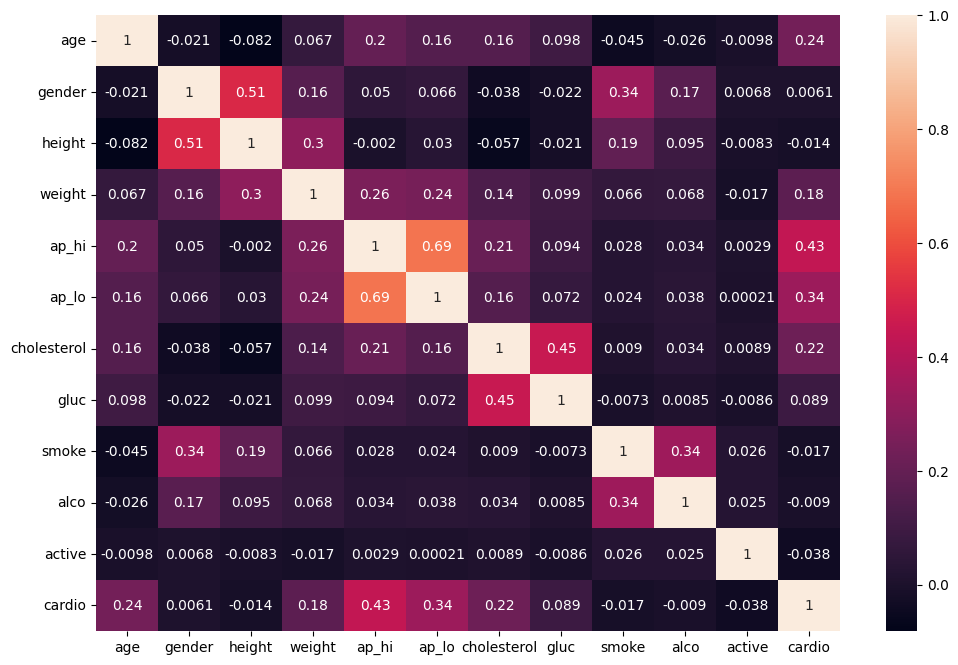

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

### Podział zbioru danych

In [4]:
X_train, y_train, X_dev, y_dev, X_test, y_test = split_dataset(df, "cardio")

## Trenowanie oraz walidacja


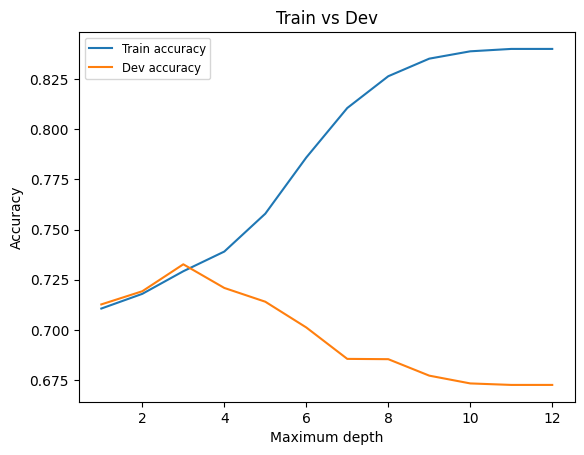

In [5]:
parameters = (1, 12)
table = experiment(X_train, y_train, X_dev, y_dev, parameters, "cardio")
results = pd.DataFrame(table)
plot(results, "Train accuracy", "Dev accuracy", "Train vs Dev")


In [6]:
results

,Maximum depth,Train accuracy,Dev accuracy
0,1,0.711,0.713
1,2,0.718,0.719
2,3,0.729,0.733
3,4,0.739,0.721
4,5,0.758,0.714
5,6,0.786,0.701
6,7,0.811,0.686
7,8,0.826,0.685
8,9,0.835,0.677
9,10,0.839,0.673


Najlepszy rezultat został osiągnięty dla głębokości przeszukiwania równej 3. Drzewo z tym parametrem zostanie sprawdzone na zbiorze testującym.
## Testowanie

In [7]:
table = test_results(X_train, y_train, X_test, y_test, 3, "cardio")
test_result = pd.DataFrame(table)
test_result

,Depth,Accuracy
0,3,0.729


# Wyniki i wnioski
### Wyniki
- Dokładności dla zbioru walidacyjnego rosły wraz ze zwiększaniem parametru głębokości aż do wartości równej 3.
- Algorytm uzyskał najlepszy wynik na zestawie walidacyjnym dla głebokości przeszukiwania równej 3.
- Dla kolejnych głębokości dokładność stopniowo malała.
- Algorytm z parametrem głębokości 3 przetestowany na zbiorze testowym osiągnął dokładność równą 72,9%
- Dokładność algorytmu względem zbioru treningowego stale rosła.
### Wnioski
- W algorytmie ID3 bardzo szybko dochodzi do overfittingu. Już przy głębokościach przeszukiwania większych od trzech dokładność dla zbioru walidacyjnego zaczyna spadać, a dokładność zbioru treningowego stale rośnie.
- Najbardziej znaczącym dla klasyfikacji atrybutem było ciśnienie skurczowe (ap_hi), a następnie ciśnienie rozkurczowe (ap_lo).
- Przy nieograniczonej głębokości drzewo osiąga maksymalną głębokość równą liczbie parametrów (w tym przypadku 11).